This notebook loads pandas dataframes pickled in a previous notebook and describes the construction of the timeseries plots.

In [104]:
import pandas as pd
import matplotlib.pyplot as pl
from datetime import datetime
import pickle
from matplotlib import rcParams
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from seaborn import boxplot, scatterplot
from IPython.core.display import HTML, display
from latexify import latexify

In [2]:
%matplotlib inline

In [153]:
# Global graphics setup
display(HTML("<style>.container {width: 90%}</style>"))
plot_colors = {'swf': '#000000',
               'aqua': '#348ABD',
               'aqua2': '#8000FF',
               'viirs': '#A60628',
               'mei': '#467821',
               }
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.size'] = 3
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 3
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'
rcParams['text.usetex'] = False
rcParams['font.family'] = 'serif'
rcParams['axes.formatter.limits'] = (-2, 3)

In [45]:
# Load the previously pickled dataframes 
df_both = pd.read_pickle('./pklJar/df_consolidated.pkl')
df_mei = pd.read_pickle('../PklJar/dfMEI.pkl')

In [39]:
def val_to_perc(val, mean):
    return (val - mean) / mean * 100


def val_anom_to_perc(val, mean):
    return val / mean * 100
    

def set_time_axis(ax):
    x_minorlocator = mdates.YearLocator()
    x_majorformatter = mdates.DateFormatter('%b\n%Y')
    ax.xaxis.set_minor_locator(x_minorlocator)
    ax.xaxis.set_tick_params(rotation=0)
    ax.xaxis.set_major_formatter(x_majorformatter)
    ax.set_xlabel('')


def make_ax_1(ax_c, df_, ylims=None, ls='-', **kwargs):
    
    lbl = kwargs.pop('lbl', 'phyto_C_mean')
    use95ci = kwargs.pop('use95ci', False)
    use50ci = kwargs.pop('use50ci', False)
    mean_val = kwargs.pop('mean_val', df_[lbl].mean())
    ylabel = kwargs.pop('ylabel', lbl)
    ylabel2 = kwargs.pop('ylabel2', lbl)
    df_.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color='k',
            legend=False)
    ax_c.set_ylabel(ylabel)
    if ylims:
        ax_c.set_ylim(ylims)
    else:
        ylims = ax_c.get_ylim()
    if use95ci:
        cols95ci = df_.filter(regex=use95ci, axis=1).columns.tolist()
        ax_c.fill_between(df_.index, df_[cols95ci[1]], df_[cols95ci[0]],
                          color='k', alpha=0.5)
    if use50ci:
        cols50ci = df_.filter(regex=use50ci, axis=1).columns.tolist()
        ax_c.fill_between(df_.index, df_[cols50ci[1]], df_[cols50ci[0]],
                          color='k', alpha=0.7)
        
    ax_c.axhline(mean_val, color='k')
    ax_p = ax_c.twinx()
    ax_p.set_ylabel(ylabel2)
    ax_p.set_ylim(val_to_perc(ylims[0], mean=mean_val),
              val_to_perc(ylims[1], mean=mean_val)
             )
    ax_c.grid(axis='x', linestyle='--', linewidth=2)
    set_time_axis(ax_c)

    
def make_ax_2(ax, df_, ls='-', ylims=None, lbl='phyto_C_anomaly', **kwargs):
    df_.plot(y=lbl, marker='+', linestyle=ls, 
                color=plot_colors['swf'], ax=ax, legend=False)
    #if use_mei:
    #    df_mei.plot(y='MEI', marker='D', ax=ax,
    #                color=plot_colors['mei'], linestyle='', legend=False)
    mean_val = kwargs.pop('mean_val', df_[lbl].mean())
    ylabel = kwargs.pop('ylabel', lbl)
    ylabel2 = kwargs.pop('ylabel2', lbl + 'anomaly (\%)')
    ax.axhline(linestyle='-', linewidth=1.5, color='k')
    ax.grid(axis='x', linestyle='--', linewidth=2)
    ax.set_ylabel(ylabel) 
    if ylims:
        ax.set_ylim(ylims)
    else:
        ylims = ax.get_ylim()
    if mean_val:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
        ax2.set_ylim(val_anom_to_perc(ylims[0], mean=mean_val),
                     val_anom_to_perc(ylims[1], mean=mean_val))
    set_time_axis(ax)
    ax.set_xlabel('')

In [14]:
df_both.head()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly
datetime,,,,,,,,,
1997-11-15,0.126552,0.001842,20.385325,21.552935,22.120413,22.762124,24.021646,-0.008520,0.021044
1997-12-15,0.126516,0.001765,19.559207,20.546520,21.218630,21.699756,23.046890,-0.009597,-0.304126
1998-01-15,0.126163,0.001726,19.085081,20.162330,20.758506,21.287907,22.512791,-0.013876,-0.070143
1998-02-15,0.125127,0.001713,18.944551,20.015984,20.610071,21.132228,22.340050,-0.020037,0.008237
1998-03-15,0.126646,0.001740,19.345028,20.307371,20.920938,21.442327,22.798734,-0.017906,0.276061


In [48]:
df_mei = df_mei.resample('MS', loffset=pd.Timedelta(14, 'd')).first()

In [80]:
df_mei = df_mei.loc['1997-11-15': '2018-08-15']

In [73]:
df_mei['inv_scaled'] = (df_mei.MEI*-1)/120 + 0.003
df_mei['inv_scaled2'] =(df_mei.MEI*-1) / 2 +.5

/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [133]:
df_mei.shape

(250, 3)

In [134]:
df_both.shape

(250, 10)

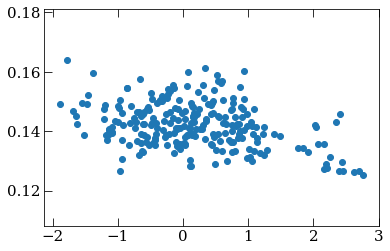

In [135]:
pl.scatter(df_mei.MEI, df_both.chl_adj_mean)

In [136]:
import pymc3 as pm

/accounts/ekarakoy/anaconda3/envs/machine_learning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [142]:
df_mei['MEI_s'] = (df_mei.MEI - df_mei.MEI.mean()) / df_mei.MEI.std()

In [ ]:
df_model = pd.concat()

In [143]:
df_mei.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 1997-11-15 to 2018-08-15
Data columns (total 4 columns):
MEI            250 non-null float64
inv_scaled     250 non-null float64
inv_scaled2    250 non-null float64
MEI_s          250 non-null float64
dtypes: float64(4)
memory usage: 9.8 KB


In [157]:
with pm.Model() as m1:
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_mei.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_both.chl_adj_mean)

In [158]:
with m1:
    trace_1 = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [likl_missing, sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1972.23draws/s]


In [159]:
with pm.Model() as m2:
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_mei.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_both.phyto_C_mean)

In [160]:
with m2:
    trace_2 = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3167.87draws/s]


In [175]:
with pm.Model() as m1_anom:
    
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_mei.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_both.chl_anomaly)

In [176]:
with m1_anom:
    trace_1_anom = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [likl_missing, sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1829.55draws/s]


In [179]:
with pm.Model() as m2_anom:
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_mei.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_both.phyto_C_anomaly)
    trace_2_anom = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4096.57draws/s]


In [180]:
alpha_chl = trace_1.get_values('alpha').mean()
beta_chl = trace_1.get_values('beta').mean()
alpha_C = trace_2.get_values('alpha').mean()
beta_C = trace_2.get_values('beta').mean()
alpha_chl_anom = trace_1_anom.get_values('alpha').mean()
beta_chl_anom = trace_1_anom.get_values('beta').mean()
alpha_C_anom = trace_2_anom.get_values('alpha').mean()
beta_C_anom = trace_2_anom.get_values('beta').mean()

In [170]:
alpha_chl, beta_chl

(0.14260551419964526, -0.0028461110009338304)

In [171]:
alpha_C, beta_C

(21.065397423706916, -0.19625541823274414)

In [183]:
df_mei['chl_scaled'] = df_mei.MEI * beta_chl + alpha_chl
df_mei['C_scaled'] = df_mei.MEI * beta_C + alpha_C
df_mei['chl_anom_scaled'] = df_mei.MEI * beta_chl_anom + alpha_chl_anom
df_mei['C_anom_scaled'] = df_mei.MEI * beta_C_anom + alpha_C_anom

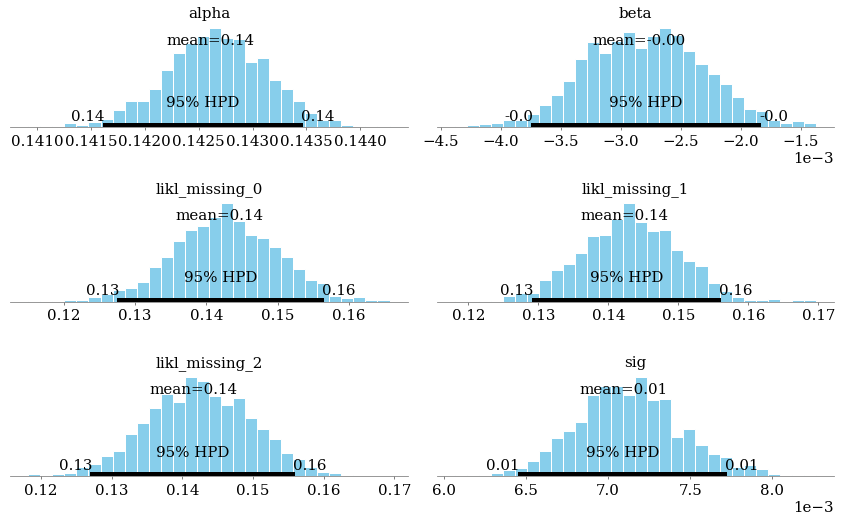

In [161]:
pm.plot_posterior(trace_1, round_to=2);

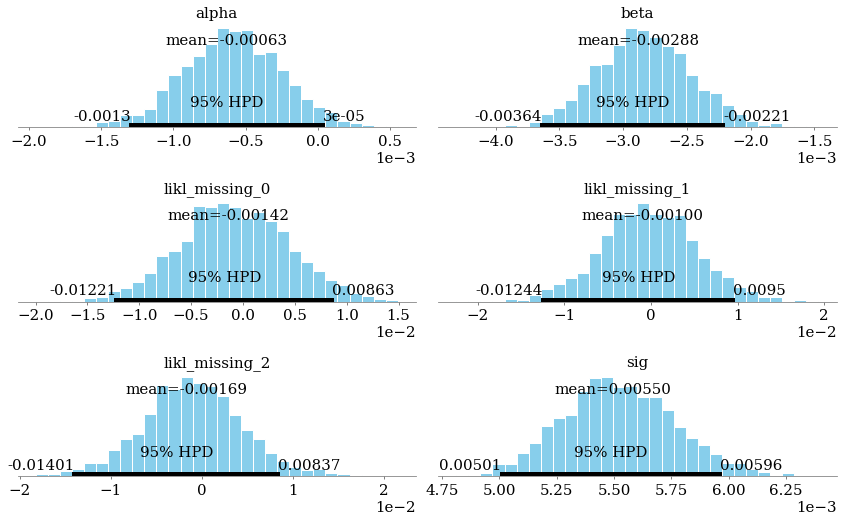

In [251]:
pm.plot_posterior(trace_1_anom, round_to=5);

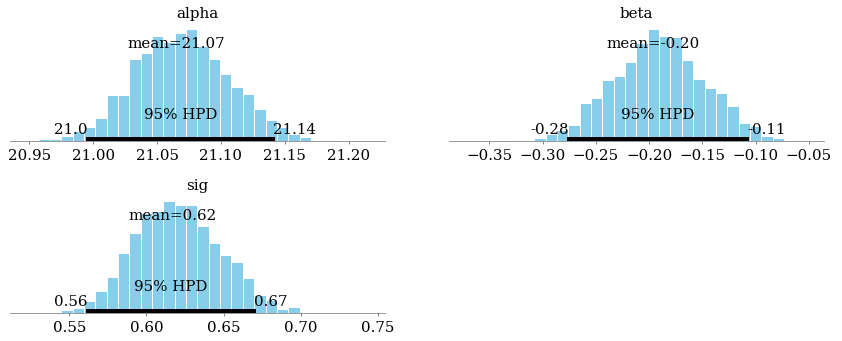

In [162]:
pm.plot_posterior(trace_2, round_to=2);

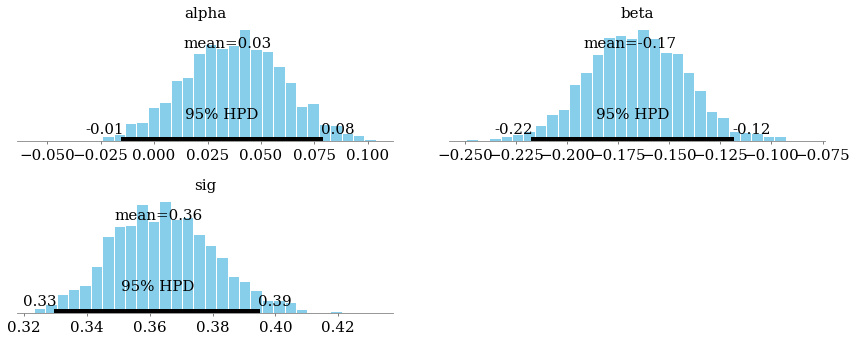

In [252]:
pm.plot_posterior(trace_2_anom, round_to=2);

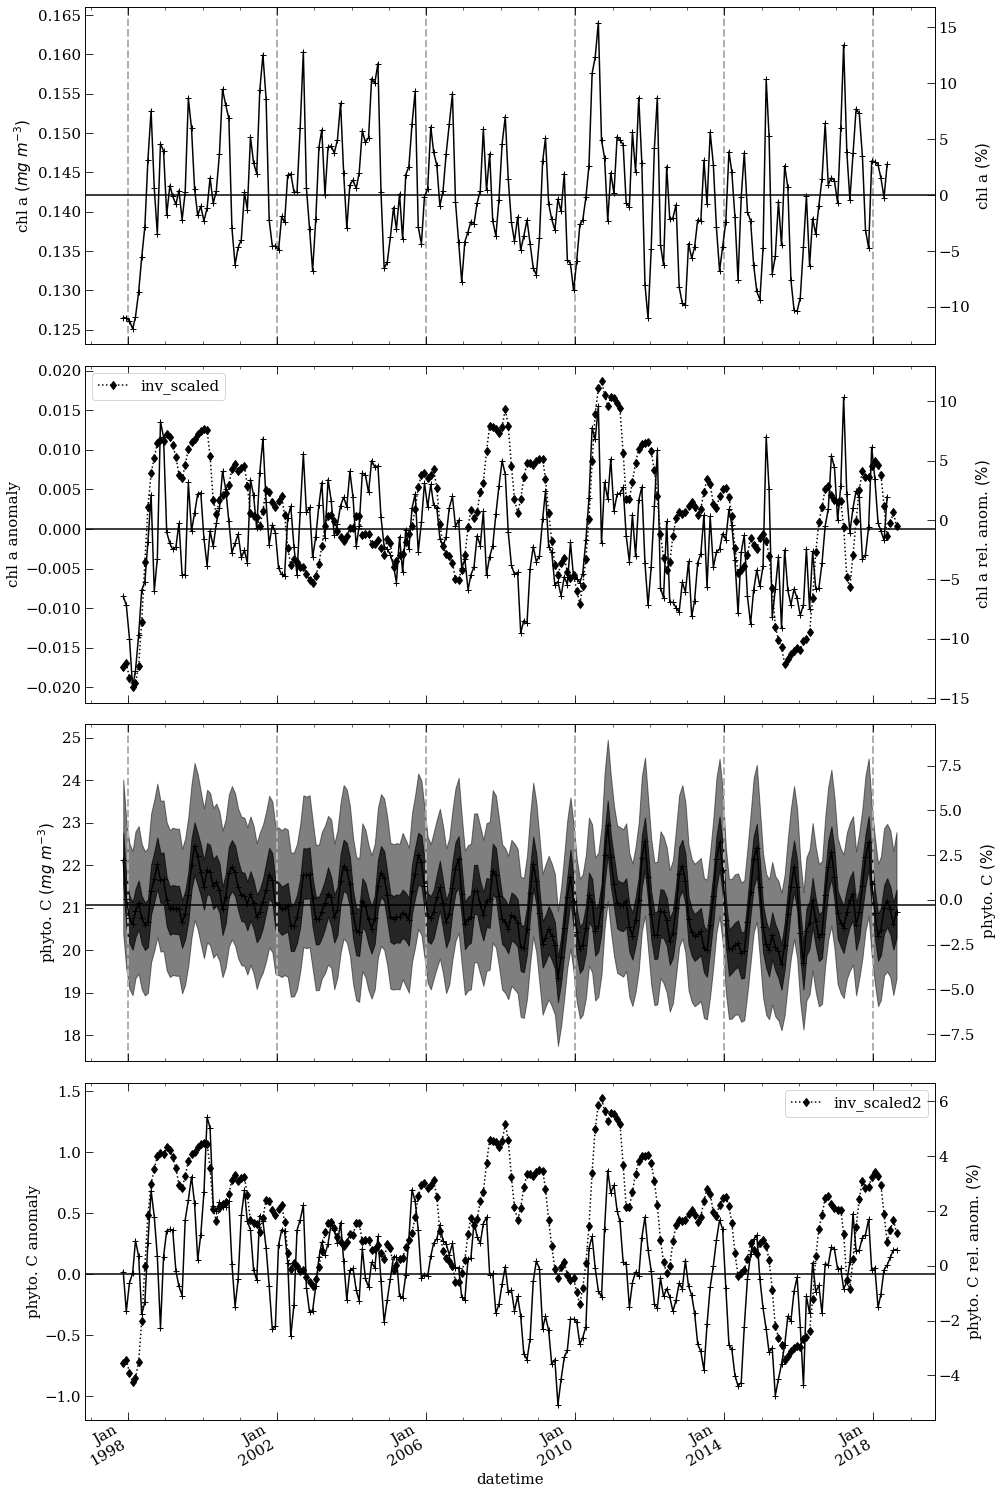

In [128]:
f, axs = pl.subplots(nrows=4, figsize=(14, 21), sharex=True)
make_ax_1(axs[0], df_both, lbl='chl_adj_mean',
          ylabel=r'chl a $(mg\ m^{-3})$', ylabel2=r'chl a $(\%)$')
make_ax_2(axs[1], df_both, lbl='chl_anomaly', mean_val=df_both.chl_adj_mean.mean(),
          ylabel='chl a anomaly', ylabel2='chl a rel. anom. $(\%)$')
df_mei.plot(y='inv_scaled', ax=axs[1], linestyle=':', marker='d', color='k')
make_ax_1(axs[2], df_both, lbl='phyto_C_mean', use95ci='_95CI_', use50ci='_50CI_', 
         ylabel=r'phyto. C $(mg\ m^{-3})$', ylabel2=r' phyto. C $(\%)$')
make_ax_2(axs[3], df_both, lbl='phyto_C_anomaly', mean_val=df_both.phyto_C_mean.mean(),
         ylabel='phyto. C anomaly', ylabel2=r'phyto. C rel. anom. $(\%)$')
df_mei.plot(y='inv_scaled2', ax=axs[3], linestyle=':', marker='d', color='k')
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/timeseries_%s.pdf' % dt_now, dpi=300, format='pdf')

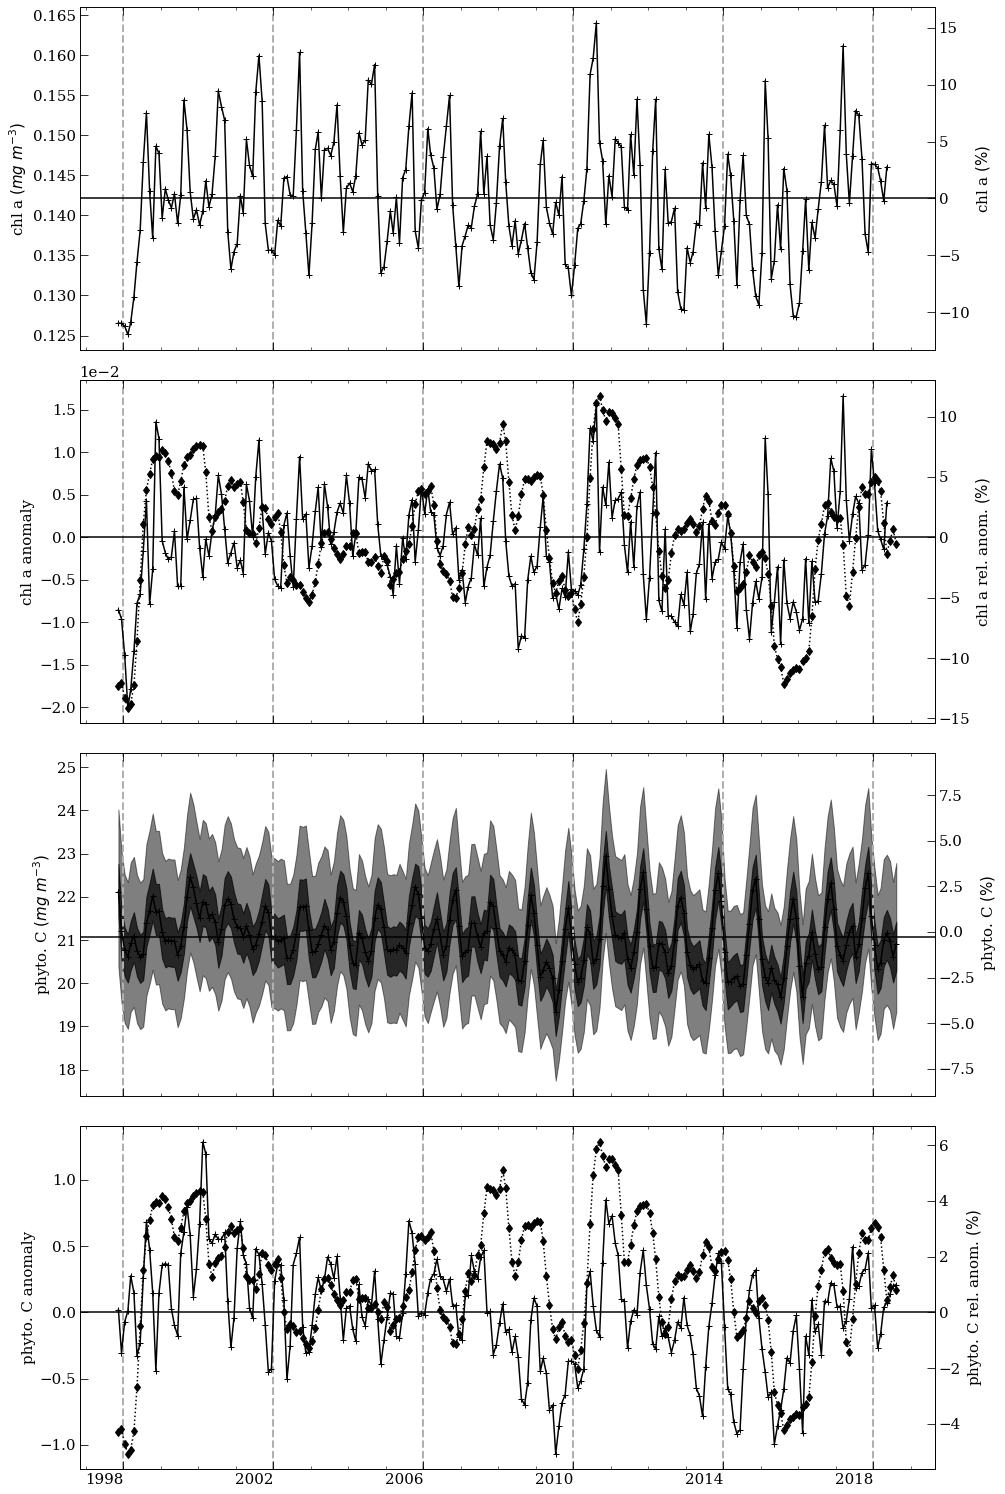

In [196]:
f, axs = pl.subplots(nrows=4, figsize=(14, 21), sharex=True)
make_ax_1(axs[0], df_both, lbl='chl_adj_mean',
          ylabel=r'chl a $(mg\ m^{-3})$', ylabel2=r'chl a $(\%)$')
make_ax_2(axs[1], df_both, lbl='chl_anomaly', mean_val=df_both.chl_adj_mean.mean(),
          ylabel='chl a anomaly', ylabel2='chl a rel. anom. $(\%)$')
#axs0_twin = axs[0].twinx()
axs1_twin = axs[1].twinx()
axs1_twin.axes.get_yaxis().set_visible(False)
axs1_twin.axes.get_yaxis().set_ticks([])
#df_mei.plot(y='chl_scaled', ax=axs0_twin, linestyle=':', marker='d', color='k')
df_mei.plot(y='chl_anom_scaled', ax=axs1_twin, linestyle=':', marker='d', color='k',
           legend=False)
make_ax_1(axs[2], df_both, lbl='phyto_C_mean', use95ci='_95CI_', use50ci='_50CI_', 
         ylabel=r'phyto. C $(mg\ m^{-3})$', ylabel2=r' phyto. C $(\%)$')
make_ax_2(axs[3], df_both, lbl='phyto_C_anomaly', mean_val=df_both.phyto_C_mean.mean(),
         ylabel='phyto. C anomaly', ylabel2=r'phyto. C rel. anom. $(\%)$')
#df_mei.plot(y='C_scaled', ax=axs[2], linestyle=':', marker='d', color='r')
axs3_twin = axs[3].twinx()
axs3_twin.yaxis.set_visible(False)
axs3_twin.set_yticks([])
df_mei.plot(y='C_anom_scaled', ax=axs3_twin, linestyle=':', marker='d', color='k',
           legend=False)
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/timeseries_%s.pdf' % dt_now, dpi=300, format='pdf')

In [213]:
df_both.rename(columns=dict(month='Month'), inplace=True)

In [215]:
df_both.index.month

Int64Index([11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
            ...
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8],
           dtype='int64', name='datetime', length=250)

In [216]:
df_both

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,Month
datetime,,,,,,,,,,
1997-11-15,0.126552,0.001842,20.385325,21.552935,22.120413,22.762124,24.021646,-0.008520,0.021044,November
1997-12-15,0.126516,0.001765,19.559207,20.546520,21.218630,21.699756,23.046890,-0.009597,-0.304126,December
1998-01-15,0.126163,0.001726,19.085081,20.162330,20.758506,21.287907,22.512791,-0.013876,-0.070143,January
1998-02-15,0.125127,0.001713,18.944551,20.015984,20.610071,21.132228,22.340050,-0.020037,0.008237,February
1998-03-15,0.126646,0.001740,19.345028,20.307371,20.920938,21.442327,22.798734,-0.017906,0.276061,March
1998-04-15,0.129805,0.001755,19.452007,20.498708,21.104070,21.644142,22.926051,-0.013439,0.149242,April
1998-05-15,0.134212,0.001726,19.080291,20.156763,20.753096,21.281551,22.506327,-0.007744,-0.327427,May
1998-06-15,0.138125,0.001713,18.937406,20.007584,20.601485,21.123879,22.331241,-0.006663,-0.228981,June
1998-07-15,0.146645,0.001719,18.997857,20.075985,20.673821,21.196884,22.408047,-0.001626,0.260490,July


In [228]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']

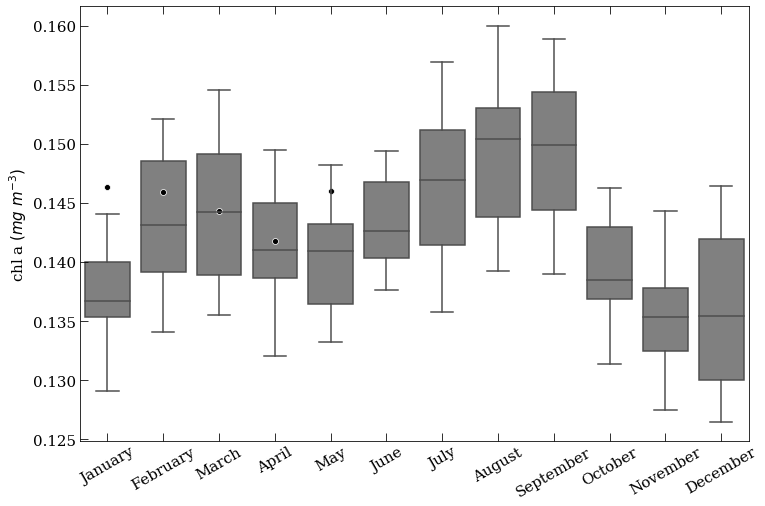

In [241]:
f, ax = pl.subplots(figsize=(12, 8))
ax = boxplot(x='Month', y='chl_adj_mean', data=df_both.loc[:'2017-12-15'], ax=ax, color='gray',
       showfliers=False, whis=[5, 95], order=ordered_months
            )

scatterplot(x='Month', y='chl_adj_mean', data=df_both.loc['2018-01-15':], ax=ax, color='k',
           sizes=[100])
ax.tick_params(axis='x', rotation=30)
ax.set_xlabel('')
ax.set_ylabel('chl a $(mg\ m^{-3})$')
f.savefig('../FigJar/boxplot_chl.pdf', dpi=300, format='pdf')

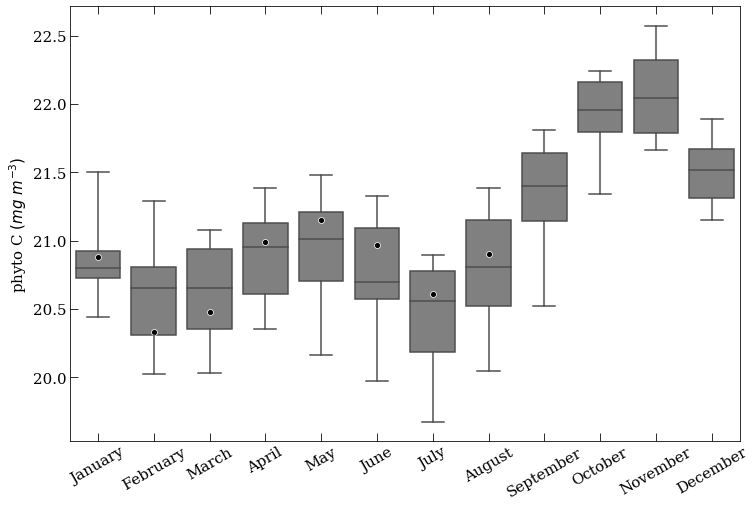

In [240]:
f, ax = pl.subplots(figsize=(12, 8))
ax = boxplot(x='Month', y='phyto_C_mean', data=df_both.loc[:'2017-12-15'], ax=ax, color='gray',
       showfliers=False, whis=[5, 95], order=['January', 'February', 'March',
                                              'April', 'May', 'June', 'July',
                                              'August', 'September', 'October',
                                              'November', 'December'])#showmeans=True)

scatterplot(x='Month', y='phyto_C_mean', data=df_both.loc['2018-01-15':], ax=ax, color='k',
           sizes=[100])
ax.tick_params(axis='x', rotation=30)
ax.set_xlabel('')
ax.set_ylabel('phyto C $(mg\ m^{-3})$')
f.savefig('../FigJar/boxplot_C.pdf', dpi=300, format='pdf')

In [243]:
group = df_both.loc[:'2017-12-15', ['Month', 'chl_adj_mean', 'phyto_C_mean']].groupby(['Month'])

In [246]:
dfboxplot = group.describe(percentiles=[0.05, 0.25, 0.5,
                            0.75, 0.95]).loc[ordered_months].drop(columns=['count', 'mean',
                                                                          'std', 'min', 'max'],
                                                                  level=1).round(decimals=3)

In [247]:
dfboxplot.to_html('boxplot.html')

In [248]:
df_both.loc['2018-01-15':, ['chl_adj_mean', 'phyto_C_mean']].to_html('currentyeardata.html')